# **Modelo de preditivo de pre√ßos das a√ß√µes da WEG SA**

## Obtive os dados de pre√ßos, volatilidade ao longo do tempo para a partir da√≠ criar um modelo estat√≠stico simples (uma regress√£o m√∫ltipla) que prev√™ os pre√ßos das a√ß√µes da WEG ao longo do per√≠odo considerado.

## √â um modelo muito b√°sico de predi√ß√£o, mas interessante.

### Carrego as bibliotecas que utilizarei:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import datetime as dt
import statsmodels.api as sm

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

### Baixar os dados de pre√ßos das a√ß√µes da WEG:

In [4]:
def dados_pre√ßosweg():

    # Definir o intervalo de datas: de 01/01/2014 at√© 31/07/2024.
    start = dt.datetime(2014, 1, 1)
    end = dt.datetime(2024, 7, 31 )

    # Lista de tickers das empresas
    tickers = ['WEGE3.SA']

    # Criar um DataFrame vazio para armazenar os dados
    df = pd.DataFrame()

    # Baixar os dados de fechamento da empresa e armazenar no DataFrame df
    for ticker in tickers:
        try:
            data = yf.download(ticker, start=start, end=end)['Close']

            # Renomear a coluna do DataFrame para incluir o ticker
            df[ticker.split('.')[0]] = data

        except Exception as e:
            print(f"Erro ao baixar dados para {ticker}: {e}")

    return df

### Colocar os dados de pre√ßos em um dataframe e plot√°-los em um gr√°fico de linhas com duas linhas de tend√™ncia (um reta, outra curva):

In [5]:
# Obter os dados
df = dados_pre√ßosweg()

[*********************100%%**********************]  1 of 1 completed


In [6]:
# Criar uma coluna Date_numeric que ser√° a data em num√©rico, d√£√£
df['Date_numeric'] = df.index.astype('int64') // 10**9
print(df)

                WEGE3  Date_numeric
Date                               
2014-01-02   4.497041    1388620800
2014-01-03   4.455621    1388707200
2014-01-06   4.479289    1388966400
2014-01-07   4.476331    1389052800
2014-01-08   4.399408    1389139200
...               ...           ...
2024-07-24  46.650002    1721779200
2024-07-25  45.950001    1721865600
2024-07-26  46.919998    1721952000
2024-07-29  46.480000    1722211200
2024-07-30  45.860001    1722297600

[2630 rows x 2 columns]


## Visualizar isso em um gr√°fico

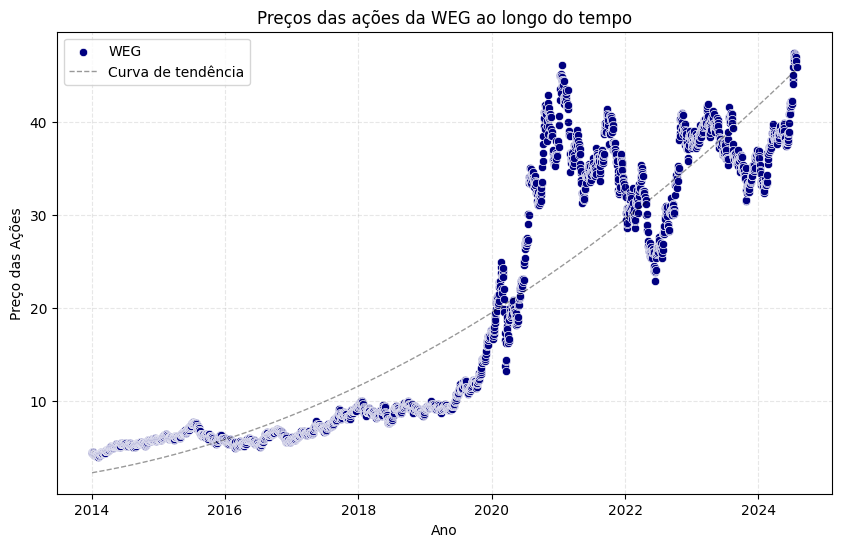

In [7]:
# Criar uma figura
plt.figure(figsize=(10, 6))

# Plotar os dados sobre os pre√ßos das a√ß√µes da WEG
sns.scatterplot(data=df, x='Date', y='WEGE3', label='WEG', color='navy')

# Adicionar linha de tend√™ncia

#ajusto os dados para uma curva polinomial de grau 2 (obtendo os coeficientes)
coeficientes = np.polyfit(df['Date_numeric'], df['WEGE3'], 2)

#crio um objeto de fun√ß√£o polinomial a partir dos coeficientes obtidos
tendencia = np.poly1d(coeficientes)

# Ploto os dados em uma curva de tend√™ncia
plt.plot(df.index, tendencia(df['Date_numeric']), label='Curva de tend√™ncia', color='black', linestyle='--', linewidth=1, alpha = 0.4)

# Nomear os eixos do gr√°fico
plt.xlabel('Ano')
plt.ylabel('Pre√ßo das A√ß√µes')

# T√≠tulo do gr√°fico
plt.title('Pre√ßos das a√ß√µes da WEG ao longo do tempo')

# Mostrar a legenda no gr√°fico
plt.legend()

# Mostrar as grades no gr√°fico
plt.grid(True, alpha = 0.3, linestyle = '--')

# Mostrar o gr√°fico
plt.show()

In [8]:
df.head()

WEGE3  Date_numeric
Date                              
2014-01-02  4.497041    1388620800
2014-01-03  4.455621    1388707200
2014-01-06  4.479289    1388966400
2014-01-07  4.476331    1389052800
2014-01-08  4.399408    1389139200

## Gr√°fico interativo

In [9]:
fig0 = px.line(df,
               x=df.index,
               y='WEGE3',
               title='Pre√ßos das a√ß√µes da WEG ao longo do tempo',
               labels={'Date': 'Data', 'WEGE3': 'Pre√ßos'},
               template='plotly_white',
               width=1000,
               height=600,
               line_shape='linear')

# cor da linha
fig0.update_traces(line_color='navy')

# Mostrar o gr√°fico
fig0.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


## Distribui√ß√£o dos pre√ßos em todo o per√≠odo (2014 a 2024):

In [10]:
#vou criar uma distribui√ß√£o com seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['WEGE3'], bins=20, kde=True, color='navy')

# Nomear os eixos do gr√°fico
plt.xlabel('Pre√ßo das A√ß√µes')
plt.ylabel('Frequ√™ncia')

#mostrar grades
plt.grid(True, alpha = 0.3, linestyle = '--')

# T√≠tulo do gr√°fico
plt.title('Distribui√ß√£o dos pre√ßos das a√ß√µes da WEG')

# Mostrar o gr√°fico
plt.show()

## Distribui√ß√£o dos pre√ßos at√© 2019

In [ ]:
# vou colocar um gr√°fico de distribui√ß√£o at√© 2019
plt.figure(figsize=(10, 6))
sns.histplot(df['WEGE3'][df.index.year <= 2019], bins=20, kde=True, color='navy')

# Nomear os eixos do gr√°fico
plt.xlabel('Pre√ßo das A√ß√µes')
plt.ylabel('Frequ√™ncia')

#mostrar grades
plt.grid(True, alpha = 0.3, linestyle = '--')

# T√≠tulo do gr√°fico
plt.title('Distribui√ß√£o dos pre√ßos das a√ß√µes da WEG')

# Mostrar o gr√°fico
plt.show()

## Distribui√ß√£o dos pre√ßos ap√≥s 2019 at√© agora

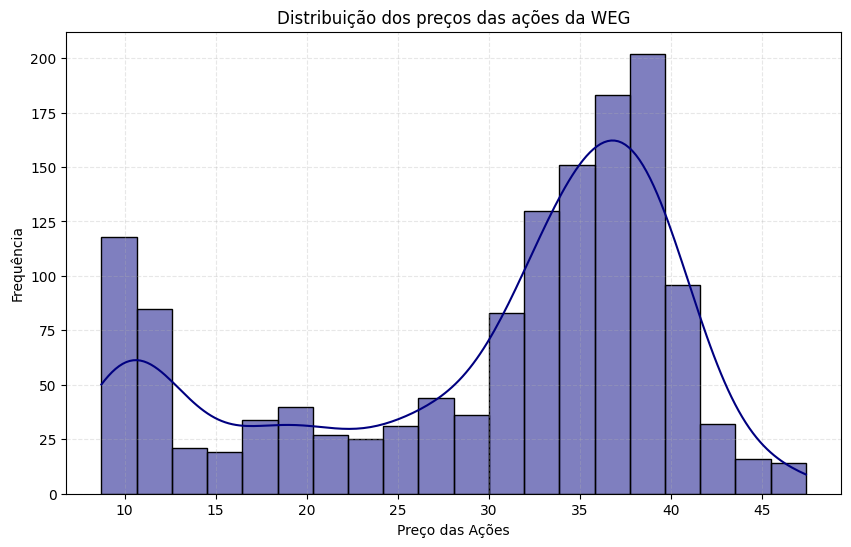

In [ ]:
#vou colocar um gr√°fico de distribui√ß√£o a partir do ano de 2019
plt.figure(figsize=(10, 6))
sns.histplot(df['WEGE3'][df.index.year >= 2019], bins=20, kde=True, color='navy')

# Nomear os eixos do gr√°fico
plt.xlabel('Pre√ßo das A√ß√µes')
plt.ylabel('Frequ√™ncia')

#mostrar grades
plt.grid(True, alpha = 0.3, linestyle = '--')

# T√≠tulo do gr√°fico
plt.title('Distribui√ß√£o dos pre√ßos das a√ß√µes da WEG')

# Mostrar o gr√°fico
plt.show()

## O patamar de pre√ßos mais comuns vem subindo

In [11]:
from sklearn.model_selection import train_test_split

## Ver como o dataframe est√° agora

In [12]:
#vou colocar o index como coluna Date
df.reset_index(inplace=True)

#vou colocar como datetime
df['Date'] = pd.to_datetime(df['Date'])
print(df)

           Date      WEGE3  Date_numeric
0    2014-01-02   4.497041    1388620800
1    2014-01-03   4.455621    1388707200
2    2014-01-06   4.479289    1388966400
3    2014-01-07   4.476331    1389052800
4    2014-01-08   4.399408    1389139200
...         ...        ...           ...
2625 2024-07-24  46.650002    1721779200
2626 2024-07-25  45.950001    1721865600
2627 2024-07-26  46.919998    1721952000
2628 2024-07-29  46.480000    1722211200
2629 2024-07-30  45.860001    1722297600

[2630 rows x 3 columns]


## Calcular a m√©dia m√≥vel de 50 em 50 cota√ß√µes

In [13]:
# Calcular a m√©dia m√≥vel de 50 dias para a coluna 'WEGE3'
df['SMA_50'] = df['WEGE3'].rolling(window=50).mean()

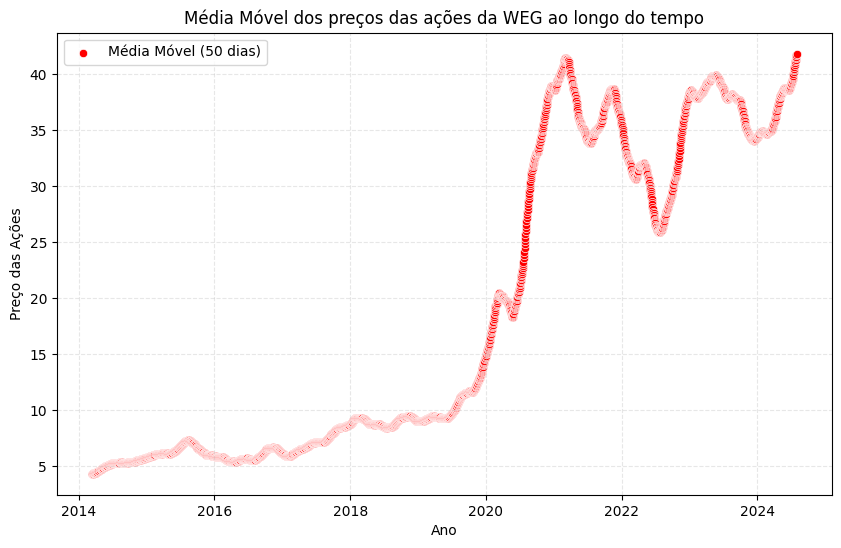

In [ ]:
#vou colocar a m√©dia m√≥vel em um gr√°fico de dispers√£o
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Date', y='SMA_50', label='M√©dia M√≥vel (50 dias)', color='red')
plt.xlabel('Ano')
plt.ylabel('Pre√ßo das A√ß√µes')
plt.title('M√©dia M√≥vel dos pre√ßos das a√ß√µes da WEG ao longo do tempo')
plt.legend()
plt.grid(True, alpha = 0.3, linestyle = '--')
plt.show()

## Vou calcular a volatilidade:

In [14]:
df['Volatility'] = df['WEGE3'].rolling(window=50).std()

In [ ]:
#ver como o df ficou
print(df)

           Date      WEGE3  Date_numeric   SMA_50  Volatility
0    2014-01-02   4.497041    1388620800      NaN         NaN
1    2014-01-03   4.455621    1388707200      NaN         NaN
2    2014-01-06   4.479289    1388966400      NaN         NaN
3    2014-01-07   4.476331    1389052800      NaN         NaN
4    2014-01-08   4.399408    1389139200      NaN         NaN
...         ...        ...           ...      ...         ...
2625 2024-07-24  46.650002    1721779200  41.2734    3.294335
2626 2024-07-25  45.950001    1721865600  41.4000    3.350647
2627 2024-07-26  46.919998    1721952000  41.5464    3.429386
2628 2024-07-29  46.480000    1722211200  41.6832    3.487716
2629 2024-07-30  45.860001    1722297600  41.8034    3.526594

[2630 rows x 5 columns]


## Veja a volatilidade

In [15]:
#vou colocar a volatilidade em um gr√°fico
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Volatility', label='Volatilidade', color='orange')

# Nomear os eixos do gr√°fico
plt.xlabel('Ano')
plt.ylabel('Pre√ßo das A√ß√µes')
plt.title('Volatilidade dos pre√ßos das a√ß√µes da WEG ao longo do tempo')
plt.legend()
plt.grid(True, alpha = 0.3, linestyle = '--')
plt.show()

## Veja como a volatilidade era baix√≠ssima at√© a pandemia. Agora ela parece querer come√ßar a se estabiliza como era antes, mas ainda n√£o conseguiu.

## Vou criar o modelo preditivo

In [23]:
df = df.dropna()  # Remover quaisquer valores nan

In [24]:
# Divis√£o dos dados:

# Vou usar 80% dos dados para treinamento e 20% para teste.
train_size = int(len(df) * 0.8)

# Separa os dados em treinamento e teste
train_data = df[:train_size]
test_data = df[train_size:]

In [25]:
# Treinamento do modelo:

#Vou lidar com as vari√°veis que ser√£o "treinadas":

# Separo as colunas (SMA_50 e Volatility) como vari√°veis independentes (X's) e armazeno em _train
# e a coluna WEGE3 como vari√°vel dependente (y) nos dados de teste, armazeno isso em y_train
X_train = train_data[['SMA_50', 'Volatility']]
y_train = train_data['WEGE3']

# Vou estimar por Modelo de regress√£o linear
modelo = LinearRegression()

#Com o comando modelo.fit eu treino o modelo (com base em uma regress√£o j√° colocada)
modelo.fit(X_train, y_train)

# Previs√µes:

#Aqui eu lido com as vari√°veis que eu usarei como "teste"
# Novamente, Separo as colunas (SMA_50 e Volatility) como vari√°veis independentes (X)
# e a coluna WEGE3 como vari√°vel dependente (y) nos dados de teste.
X_test = test_data[['SMA_50', 'Volatility']]
y_test = test_data['WEGE3']

# Uso o modelo treinado para fazer previs√µes nos dados de teste (X_test),
# armazenando as previs√µes em 'predictions'
predictions = modelo.predict(X_test)

# Avalia√ß√£o do modelo:

#Calcula o erro quadr√°tico m√©dio (RMSE) e o erro absoluto m√©dio (MAE) para avaliar a precis√£o do modelo
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

#Escreve os dois na tela
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 2.5501483017852777
MAE: 2.091737576245283


## Veja como o dataframe est√° agora:

In [26]:
test_data = test_data.copy()
print(test_data)

           Date      WEGE3  Date_numeric   SMA_50  Volatility
2113 2022-07-06  27.100000    1657065600  26.3112    1.695403
2114 2022-07-07  27.610001    1657152000  26.2308    1.524756
2115 2022-07-08  27.270000    1657238400  26.1536    1.360514
2116 2022-07-11  26.580000    1657497600  26.0832    1.237665
2117 2022-07-12  26.590000    1657584000  26.0362    1.169720
...         ...        ...           ...      ...         ...
2625 2024-07-24  46.650002    1721779200  41.2734    3.294335
2626 2024-07-25  45.950001    1721865600  41.4000    3.350647
2627 2024-07-26  46.919998    1721952000  41.5464    3.429386
2628 2024-07-29  46.480000    1722211200  41.6832    3.487716
2629 2024-07-30  45.860001    1722297600  41.8034    3.526594

[517 rows x 5 columns]


## Vou plotar no gr√°fico os dados com a varia√ß√£o real e a varia√ß√£o que o modelo previu para o per√≠odo

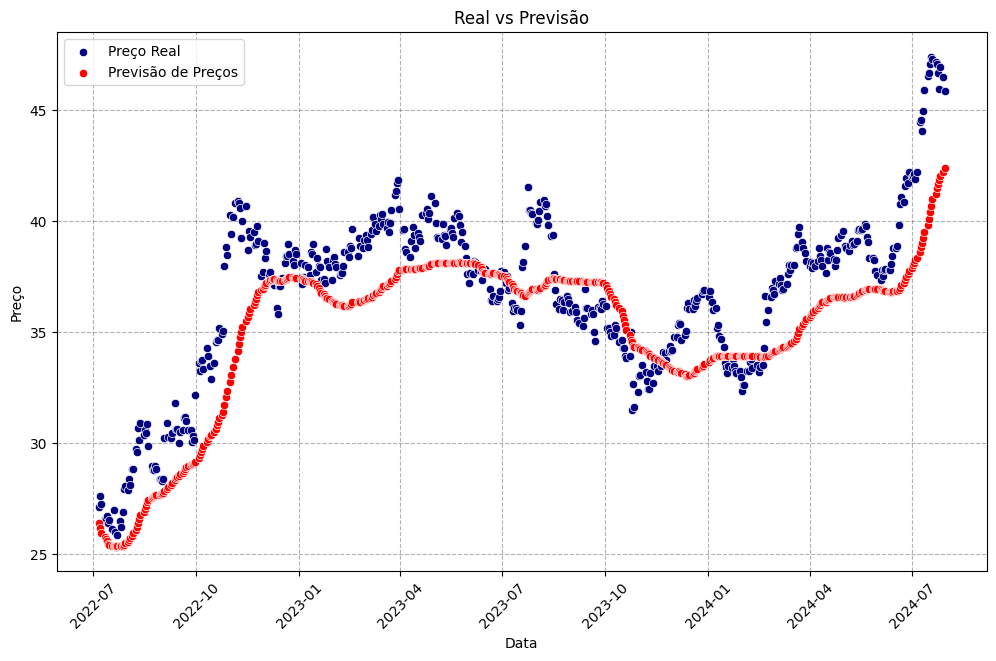

In [27]:
# Visualiza√ß√£o dos resultados com Seaborn
plt.figure(figsize=(12, 7))

#Gr√°fico dos dados reais
sns.scatterplot(x=test_data['Date'], y=y_test, label='Pre√ßo Real', color='navy')

#Gr√°fico das previs√µes
sns.scatterplot(x=test_data['Date'], y=predictions, label='Previs√£o de Pre√ßos', color='red')

# Nomear os eixos do gr√°fico
plt.xlabel('Data')
plt.ylabel('Pre√ßo')
plt.title('Real vs Previs√£o')

#Rotaciona os r√≥tulos do eixo x
plt.xticks(rotation=45)

# Mostrar a legenda no gr√°fico
plt.legend()

#Mostrar grades
plt.grid(True, alpha = 0.3, linestyle = '--', color = 'black')
plt.show()



---



## Rodei uma modelagem para testar se o modelo est√° ou n√£o sobreajustado. Isso significaria que ele √© ajustado para modelar os dados, mas n√£o √© bom para prever os dados futuros de pre√ßos

## Obtive isso:
Treino MSE: 3.6428

Teste MSE: 3.9048

Treino R¬≤: 0.9809

Teste R¬≤: 0.9797

CV MSE: 4.3608

## **Interpreta√ß√£o disso:**

## N√£o h√° uma evid√™ncia clara de overfitting (modelagem sobreajustada): O modelo apresenta um desempenho consistente em termos de R¬≤ entre treinamento e teste, e a diferen√ßa entre os MSEs de treinamento e teste n√£o √© muito grande.

##Isso √© um poss√≠vel sinal de subajuste ou necessidade de ajuste: O MSE da valida√ß√£o cruzada mais alto sugere que h√° espa√ßo para melhorias na generaliza√ß√£o.

## Na verdade esse subajuste apenas mostra que outras vari√°veis explicam os pre√ßos das a√ß√µes da empresa. A modelagem rodada n√£o comporta todas essas vari√°veis. N√£o era a inten√ß√£o. A inten√ß√£o de fato √© criar uma modelagem muito muito b√°sica mesmo



---



---



## Vou criar uma modelagem estat√≠stica de Regress√£o Log√≠stica para calcular a probabilidade do pre√ßo da a√ß√£o cair com base nesses dois fatores

In [28]:
# Criar a vari√°vel bin√°ria Price_Drop
df['Price_Drop'] = np.where(df['WEGE3'].shift(-1) < df['WEGE3'], 1, 0)

In [29]:
# Vari√°veis independentes
X = df[['SMA_50', 'Volatility']]
# Adicionar constante para o modelo
X = sm.add_constant(X)

# Vari√°vel dependente
y = df['Price_Drop']

# Ajustar o modelo de regress√£o log√≠stica
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Resumo do modelo
print(result.summary())

# Prever a probabilidade de queda no pre√ßo da a√ß√£o
df['Predicted_Prob'] = result.predict(X)

# Visualizar as previs√µes
print(df[['WEGE3', 'Price_Drop', 'Predicted_Prob']].head())

Optimization terminated successfully.
         Current function value: 0.690608
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             Price_Drop   No. Observations:                 2581
Model:                          Logit   Df Residuals:                     2578
Method:                           MLE   Df Model:                            2
Date:                Wed, 07 Aug 2024   Pseudo R-squ.:                0.002234
Time:                        15:03:25   Log-Likelihood:                -1782.5
converged:                       True   LL-Null:                       -1786.5
Covariance Type:            nonrobust   LLR p-value:                   0.01848
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2430      0.067     -3.607      0.000      -0.375      -0.111
SMA_50         0.0084      0.

## Analisando o resultado acima:

## O Pseudo R-squ. foi de 0.002092 -- o que √© muito pequeno. Valores mais pr√≥ximos de 1 indicam melhor ajuste. Aqui, 0.002092 √© muito muit baixo, assim, podemos cravar que o modelo n√£o explica bem a varia√ß√£o na vari√°vel dependente (queda de pre√ßos). Essa √© uma medida de qu√£o bem as vari√°veis independentes (volatilidade e m√©dia m√≥vel) explicam a variabilidade da vari√°vel dependente (pre√ßo da a√ß√£o). Dessa forma, conclui-se que a volatilidade e a m√©dia dos pre√ßos anteriores n√£o explicam bem se os pre√ßos futuros ca√≠r√£o (e, consequentemente, n√£o explica bem se eles subir√£o)

## - Log-Likelihood: -1779.1
### O valor da log-verossimilhan√ßa do modelo ajustado. Valores mais altos (menos negativos) indicam melhor ajuste. Ou seja, o ajuste √© terr√≠vel. Indicando que n√£o se pode prever bem quedas de pre√ßos a partir das vari√°veis explicativas consideradas no modelo.

## Veja a an√°lise dos coeficientes obtidos:
## - const: A constante (intercepto) √© significativa (p < 0.05), indicando que, quando SMA_50 e Volatility s√£o zero, a log-odds de uma queda no pre√ßo √© -0.2402.

##- SMA_50: Um coeficiente positivo sugere que um aumento na m√©dia m√≥vel de 50 dias (SMA_50) est√° associado a um aumento na log-odds de um Price_Drop. No caso, obtivemos 0.0083. O que √© positivo, mas bem pequeno. Por√©m, como o p-valor √© 0.049, este coeficiente √© marginalmente significativo ao n√≠vel de 5%, sugerindo que um aumento na m√©dia m√≥vel de 50 dias (SMA_50) est√° associado a um aumento na log-odds de um Price_Drop. Um aumento da m√©dia m√≥vel est√° relacionado a uma queda futura nos pre√ßos. √â como o Carpini disse: "Quanto mais a gente ganha, mais pr√≥ximo da derrota"

## - Volatility: O coeficiente de Volatility n√£o √© significativo (p > 0.05), indicando que a volatilidade n√£o tem um efeito estatisticamente significativo na probabilidade de queda no pre√ßo da a√ß√£o.

## **√â apenas um jeito bonito de dizer que n√£o tem como prever o futuro!**



---



---



## Mesmo assim, l√° vamos n√≥s: agora sim vou para as previs√µes com base em um modelo baseado nos dados anteriores.

## Vou pegar esses dados e deduzir, estatisticamente, onde os pre√ßos das a√ß√µes da empresa deveriam estar dado que vou modelar que esses pre√ßos dependem, na m√©dia, da m√©dia m√≥vel dos pre√ßos anteriores e da volatilidade m√≥vel

## Dessa forma, quero utilizar esse modelo criado para prever os pre√ßos futuros das a√ß√µes da WEG at√© o final do ano. Note que o pr√≥ximo modelo ser√° muito simplificado, irrealista e vai prever mal os resultados. Mas √© s√≥ para come√ßar.

In [30]:
# Novo treinamento do modelo com todos os dados

#especifico as vari√°veis independentes e as dependentes
X = df[['SMA_50', 'Volatility']]
y = df['WEGE3']

#crio o modelo de regress√£o
model = LinearRegression()
model.fit(X, y)

# Gero datas futuras at√© janeiro de 2025
dates_future = pd.date_range(start=df['Date'].max(), periods=200, freq='D')

# DataFrame para armazenar as datas futuras
future_data = pd.DataFrame({'Date': dates_future})

# Calcular SMA_50 e Volatility para datas futuras
# Como n√£o temos dados reais futuros, vamos assumir que SMA_50 e Volatility para as datas futuras ser√£o iguais ao √∫ltimo valor conhecido
# Este √© um m√©todo simples e pode ser melhorado com uma abordagem mais robusta, mas por hora vamos usar isso.

last_sma_50 = df['SMA_50'].iloc[-1]
last_volatility = df['Volatility'].iloc[-1]

future_data['SMA_50'] = last_sma_50
future_data['Volatility'] = last_volatility

# Realizar as previs√µes para as datas futuras
X_future = future_data[['SMA_50', 'Volatility']]
predictions_future = model.predict(X_future)

# Adicionar as previs√µes ao DataFrame das datas futuras
future_data['Predicted_WEGE3'] = predictions_future

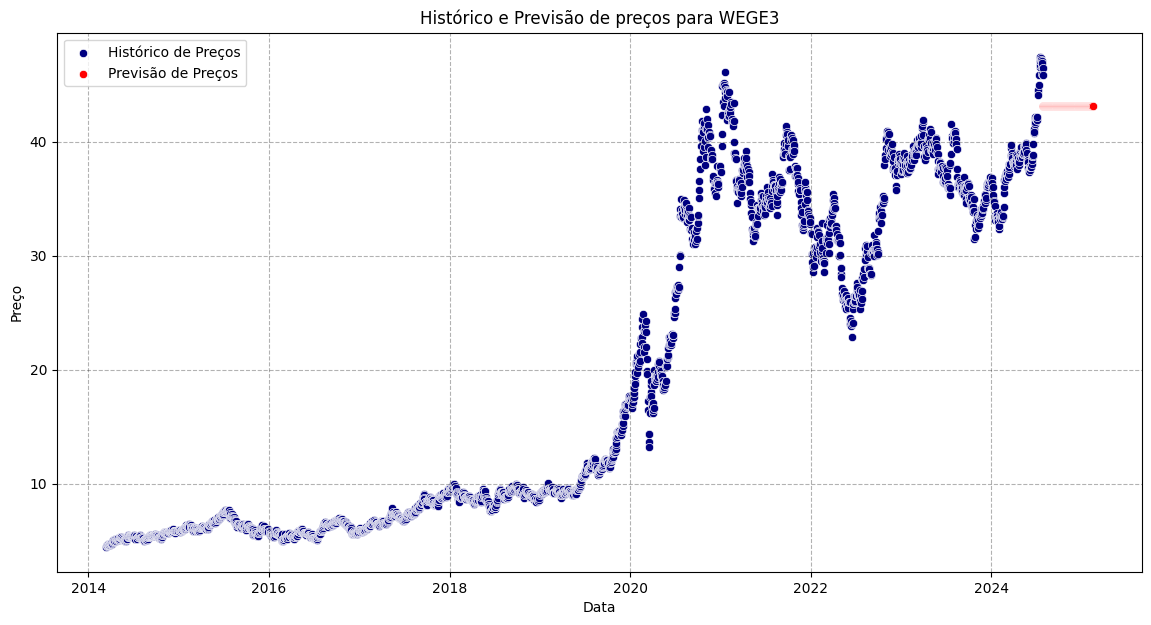

In [31]:
# Visualiza√ß√£o dos resultados
plt.figure(figsize=(14, 7))

#vou plotar os dados os dados e a previs√£o
sns.scatterplot(x=df['Date'], y=df['WEGE3'], label='Hist√≥rico de Pre√ßos', color='navy')
sns.scatterplot(x=future_data['Date'], y=future_data['Predicted_WEGE3'], label='Previs√£o de Pre√ßos', color='red')

# Nomear os eixos do gr√°fico
plt.xlabel('Data')
plt.ylabel('Pre√ßo')
plt.title('Hist√≥rico e Previs√£o de pre√ßos para WEGE3')
plt.legend()
plt.grid(True, alpha = 0.3, linestyle = '--', color = 'black')
plt.show()

## Veja que ficou p√©ssimo.

## A seguir vou continuar treinando um modelo que se ajuste melhor.



---



## Vou criar um teste para verificar qual √© o melhor modelo para se utilizar nesse caso.

In [37]:
# Passo 1: Definir vari√°veis independentes (X) e dependente (y)
X = df[["SMA_50", "Volatility"]]
y = df["WEGE3"]

# Passo 2: Tratar valores ausentes
# Preencher NaNs com a m√©dia das colunas
X = X.fillna(X.mean())

# Passo 3: Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 4: Definir os modelos de regress√£o
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

# Passo 5: Treinar e avaliar os modelos
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores


{'Linear Regression': 0.9831980739783437,
 'Ridge': 0.9831978654155615,
 'Lasso': 0.9817253279123527,
 'ElasticNet': 0.9817253274874843,
 'SVR': 0.9819318073857136,
 'Random Forest': 0.9920519429245175}

## O modelo de Random Forest teve o melhor score. Vou usar ele.

## Treinando o modelo:

In [38]:
# Passo 1: Definir vari√°veis independentes (X) e dependente (y)
X = df[["SMA_50", "Volatility"]]
y = df["WEGE3"]

# Passo 2: Tratar valores ausentes
X = X.fillna(X.mean())

# Passo 3: Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 4: Definir e treinar o modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Passo 5: Avaliar o modelo
model_score = model.score(X_test, y_test)

0.9919580847319499

## Fa√ßo as previs√µes feitas pelo modelo treinado e armazeno em y_pred

In [39]:
# Passo 6: Fazer previs√µes com o modelo treinado
y_pred = model.predict(X_test)

In [43]:
# Passo 7: Criar um DataFrame com as datas, valores reais e previs√µes
results_df = pd.DataFrame({
    'Date': X_test.index,  # Assumindo que o √≠ndice do seu DataFrame √© a data
    'Real': y_test,
    'Predicted': y_pred
})

In [44]:
# Passo 8: Visualiza√ß√£o dos resultados
plt.figure(figsize=(14, 7))

# Plotar os dados reais e as previs√µes
sns.scatterplot(x='Date', y='Real', data=results_df, label='Valores Reais', color='navy')
sns.scatterplot(x='Date', y='Predicted', data=results_df, label='Previs√µes', color='red')

# Nomear os eixos do gr√°fico
plt.xlabel('Data')
plt.ylabel('Pre√ßo')
plt.title('Valores Reais vs. Previs√µes para WEGE3')
plt.legend()
plt.grid(True, alpha=0.3, linestyle='--', color='black')

# Rotacionar as labels do eixo x para melhor visualiza√ß√£o
plt.xticks(rotation=45)

plt.tight_layout()  # Ajusta o layout para evitar cortes no gr√°fico
plt.show()

## Veja que esse modelo ficou mais ajustado que o anterior.

## Prever o futuro atrav√©s do modelo escolhido. Sim, vou tentar prever o caminho das pr√≥ximas 100 cota√ß√µes.

In [49]:
from sklearn.ensemble import RandomForestRegressor

# Passo 1: Preparar os dados
X = df[["SMA_50", "Volatility"]]
y = df["WEGE3"]

# Tratar valores ausentes
X = X.fillna(X.mean())

# Passo 2: Treinar o modelo com todos os dados dispon√≠veis
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Passo 3: Criar dados futuros para previs√£o
last_date = pd.to_datetime(df['Date'].iloc[-1])
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=100)

# Inicializar o DataFrame futuro
future_data = pd.DataFrame(index=future_dates, columns=["SMA_50", "Volatility"])

# Preencher o DataFrame futuro com os √∫ltimos valores conhecidos
future_data["SMA_50"] = X["SMA_50"].iloc[-1]
future_data["Volatility"] = X["Volatility"].iloc[-1]

# Passo 4: Fazer previs√µes
future_predictions = model.predict(future_data)

# Passo 5: Criar DataFrame com previs√µes
future_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted_WEGE3": future_predictions
})


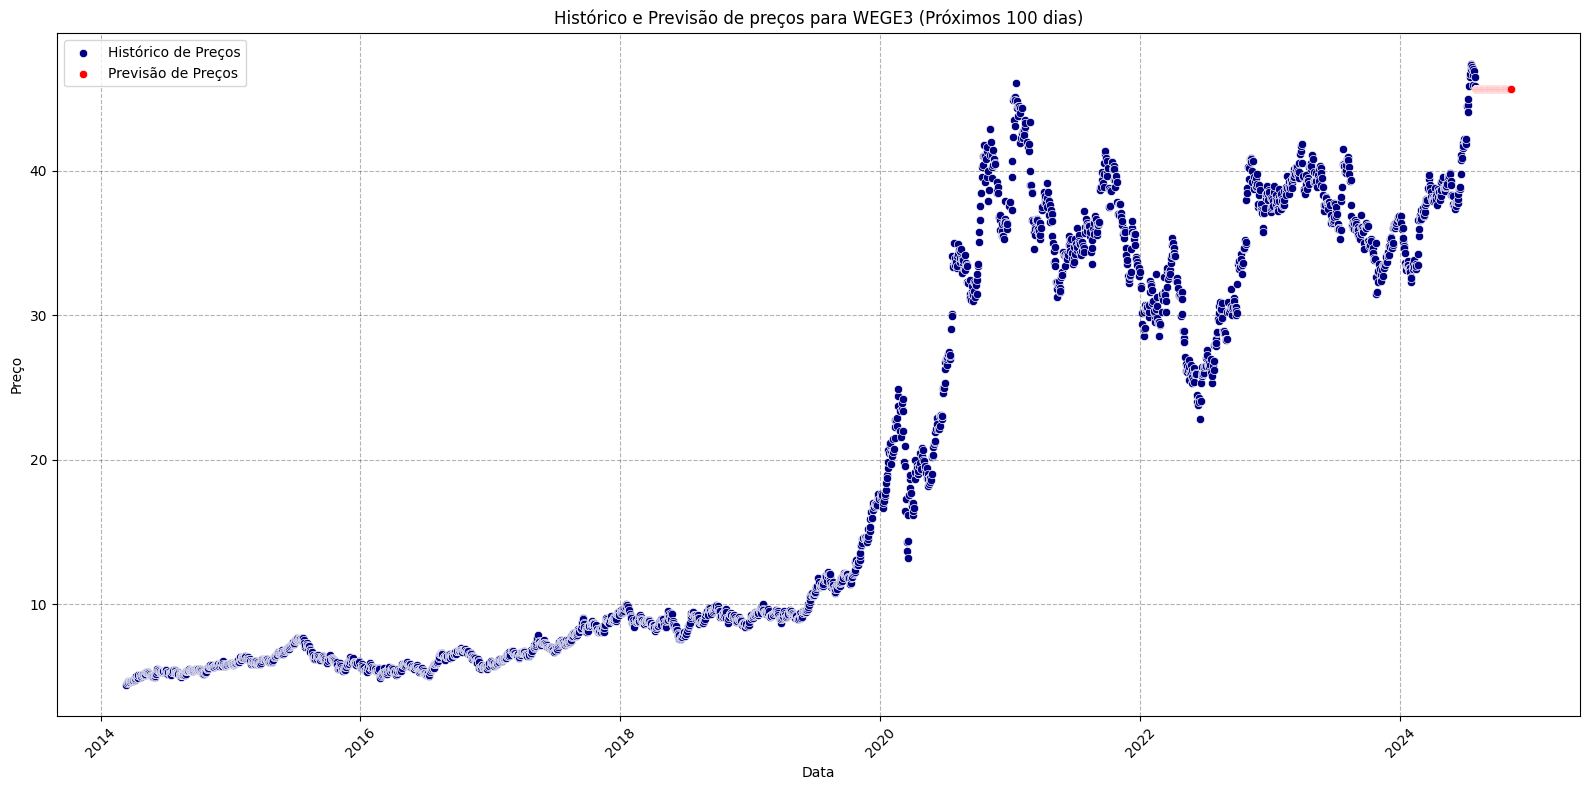

In [50]:
# Passo 6: Visualiza√ß√£o
plt.figure(figsize=(16, 8))

# Plotar dados hist√≥ricos
sns.scatterplot(x=pd.to_datetime(df["Date"]), y=df["WEGE3"], label='Hist√≥rico de Pre√ßos', color='navy')

# Plotar previs√µes futuras
sns.scatterplot(x=future_df["Date"], y=future_df["Predicted_WEGE3"], label='Previs√£o de Pre√ßos', color='red')

plt.xlabel('Data')
plt.ylabel('Pre√ßo')
plt.title('Hist√≥rico e Previs√£o de pre√ßos para WEGE3 (Pr√≥ximos 100 dias)')
plt.legend()
plt.grid(True, alpha=0.3, linestyle='--', color='black')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Segundo a modelagem os pre√ßos das a√ß√µes dessa empresa podem bem ser at√© que bem previstos por fatores como os crescimentos anteriores dos pre√ßos das a√ß√µes e pelo grau de volatilidade desses pre√ßos. Do mesmo modo, por√©m, esse modelo demonstra que outros fatores influenciam na cota√ß√£o de pre√ßos da empresa.

## Vou enumerar alguns fatores: al√©m dos resultados dos medidores de desempenho da pr√≥pria empresa, fatores macroecon√¥micos internos e externos e uma outra centena de vari√°veis tamb√©m influenciam esses pre√ßos.

## Veja que isso n√£o contradiz o resultado da regress√£o log√≠stica. A regress√£o naquele caso tentou mostrar a probabilidade de os pre√ßos ca√≠rem num futuro com base nos fatores colocados. No caso do modelo preditivo tentou-se modelar os pre√ßos da empresa dado a explica√ß√£o deles por meio dos dois fatores considerados (m√©dia m√≥vel e volatilidade) e comparar isso com os pre√ßos reais verificados no per√≠odo üòâ

#**END.!**